# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
def jaccard_similarity(d1,d2):
    lemmatizer = WordNetLemmatizer()

    words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
    words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

    inter = len(set(words1).intersection(set(words2)))
    union = len(set(words1).union(set(words2)))

    return inter/union

In [3]:
d1 = "Think like a man of action and act like man of thought"
d2 = "Try no to become a man of success but rather try to become a man of value"
d3 = "Give me liberty, or give me death"

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))


0.17647058823529413
0.0
0.0


In [4]:
import numpy as np

tiv = TfidfVectorizer()
corpus = [d1, d2, d3]

tfidf = tiv.fit_transform(corpus).todense()

array_0 = np.asarray(tfidf[0])
array_1 = np.asarray(tfidf[1])
array_2 = np.asarray(tfidf[2])

print(cosine_similarity(array_0, array_0))
print(cosine_similarity(array_0, array_1))
print(cosine_similarity(array_1, array_2))


[[1.]]
[[0.26953459]]
[[0.]]


## 한국어 형태소 분석기 설치

In [5]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 42.2 MB/s eta 0:00:00


* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [6]:
# Mecab 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

# mecab-python의 버전 오류로 인해 아래 패키지를 설치하면 코랩에서 Mecab을 사용가능
!pip install mecab-python3

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [633 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,036 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,576 kB]
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,282 kB]
Get:1

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [7]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [8]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
    reviews.append(i.split('\t')[1])
print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [9]:
from konlpy.tag import Mecab
tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]
reviews

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'],
 ['디자인',
  '을',
  '배우',
  '는',
  '학생',
  '으로',
  ',',
  '외국',
  '디자이너',
  '와',
  '그',
  '들',
  '이',
  '일군',
  '전통',
  '을',
  '통해',
  '발전',
  '해',
  '가',
  '는',
  '문화',
  '산업',
  '이',
  '부러웠',
  '는데',
  '.',
  '사실',
  '우리',
  '나라',
  '에서',
  '도',
  '그',
  '어려운',
  '시절',
  '에',
  '끝',
  '까지',
  '열정',
  '을',
  '지킨',
  '노라노',
  '같',
  '은',
  '전통',
  '이',
  '있',
  '어',
  '저',
  '와',
  '같',
  '은',
  '사람',
  '들',
  '이',
  '꿈',
  '을',
  '꾸',
  '고',
  '이뤄나갈',
  '수',
  '있',
  '다는',
  '것',
  '에',
  '감사',
  '합니다',
  '.'],
 ['폴리스',
  '스토리',
  '시리즈',
  '는',
  '1',
  '부터',
  '뉴',
  '까지',
  '버릴',
  '께',
  '하나',
  '도',
  '없',
  '음',
  '.',
  '.',
  '최고',
  '.'],
 ['와',
  '.',
  '.',
  '연기',
  '가',
  '진짜',
  '개',
  '쩔',
  '구나',
  '.',
  '.',
  '지루',
  '할거',
  '라고',
  '생각',
  '했',
  '는데',
  '몰입',
  '해서',
  '봤',
  '다',
  '.',
  '.',
  '그래',
  '이런',
  '게',
  '진짜',
  '영화',
  '지'],
 ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화',

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [10]:
!pip install cython
!pip install --upgrade numpy scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.2 which is incompatible.


In [11]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc


* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [12]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [13]:
# model.wv.most_similar

In [14]:
word2vec.wv['영화']

array([-0.20596702,  0.42865056, -0.08814816,  0.31809366,  0.3378312 ,
       -0.59843504,  0.25441855,  0.773341  , -0.04588202, -0.37494186,
        0.08471207, -0.46540847, -0.10228978, -0.10946146,  0.33116698,
       -0.34713256,  0.23485014, -0.71049494,  0.32435226, -0.5915764 ,
       -0.04095373,  0.10952523,  0.6035885 ,  0.32375562,  0.04058821,
        0.38447937, -0.32209086, -0.10421079, -0.39509624,  0.3980133 ,
        0.03000091,  0.0133313 ,  0.03656846, -0.4283014 , -0.07294258,
        0.6554895 ,  0.41937026, -0.7715626 , -0.548095  , -0.54871655,
        0.21969977, -0.2932888 , -0.33869982,  0.03100396,  0.30269155,
        0.45576492, -0.32121617,  0.1555571 ,  0.14629972,  0.03216944,
        0.16592517, -0.17375109, -0.28079495, -0.49967673, -0.3312144 ,
       -0.17077455,  0.20199701,  0.14186762, -0.25287953,  0.0056785 ,
        0.15322633, -0.1178493 ,  0.16411845,  0.1027815 , -0.24957956,
       -0.05250647,  0.10221007,  0.15179028, -0.9168232 ,  0.17

In [15]:
word2vec.wv.most_similar('영화')

[('듯', 0.9405160546302795),
 ('작품', 0.9399293661117554),
 ('가슴', 0.9176511764526367),
 ('잔잔', 0.9086297750473022),
 ('마음', 0.9080314040184021),
 ('이야기', 0.9040980339050293),
 ('표현', 0.9035298228263855),
 ('모습', 0.9022049903869629),
 ('느낌', 0.9007543325424194),
 ('봐야', 0.9003354907035828)]

* t-sne을 이용한 단어 벡터 시각화

In [17]:
word2vec.wv.key_to_index

{'.': 0,
 '이': 1,
 '는': 2,
 '영화': 3,
 '다': 4,
 '고': 5,
 '의': 6,
 '하': 7,
 '을': 8,
 '에': 9,
 '가': 10,
 '은': 11,
 '!': 12,
 '도': 13,
 '보': 14,
 '게': 15,
 '한': 16,
 '있': 17,
 ',': 18,
 '들': 19,
 '좋': 20,
 '..': 21,
 '를': 22,
 '지': 23,
 '재밌': 24,
 '었': 25,
 '봤': 26,
 '정말': 27,
 '최고': 28,
 '네요': 29,
 '너무': 30,
 '적': 31,
 '는데': 32,
 '나': 33,
 '어요': 34,
 '잘': 35,
 '수': 36,
 '음': 37,
 '없': 38,
 '지만': 39,
 '에서': 40,
 '만': 41,
 '과': 42,
 '?': 43,
 '았': 44,
 '아': 45,
 '것': 46,
 '으로': 47,
 '로': 48,
 '습니다': 49,
 '같': 50,
 'ㅋㅋ': 51,
 '진짜': 52,
 '어': 53,
 '~': 54,
 '감동': 55,
 '연기': 56,
 '던': 57,
 '했': 58,
 '않': 59,
 '와': 60,
 '안': 61,
 '인': 62,
 '생각': 63,
 '면': 64,
 '되': 65,
 '재미있': 66,
 '해': 67,
 '점': 68,
 '주': 69,
 '거': 70,
 '기': 71,
 '때': 72,
 '말': 73,
 '그': 74,
 '평점': 75,
 '더': 76,
 '내': 77,
 '싶': 78,
 '드라마': 79,
 '본': 80,
 '할': 81,
 '다시': 82,
 'ㅋㅋㅋ': 83,
 '사랑': 84,
 '잼': 85,
 '사람': 86,
 '네': 87,
 '볼': 88,
 '듯': 89,
 '이런': 90,
 '10': 91,
 '까지': 92,
 '중': 93,
 '였': 94,
 '년': 95,
 '보다': 96,
 '번': 9

In [18]:
word2vec.wv.key_to_index.keys()

dict_keys(['.', '이', '는', '영화', '다', '고', '의', '하', '을', '에', '가', '은', '!', '도', '보', '게', '한', '있', ',', '들', '좋', '..', '를', '지', '재밌', '었', '봤', '정말', '최고', '네요', '너무', '적', '는데', '나', '어요', '잘', '수', '음', '없', '지만', '에서', '만', '과', '?', '았', '아', '것', '으로', '로', '습니다', '같', 'ㅋㅋ', '진짜', '어', '~', '감동', '연기', '던', '했', '않', '와', '안', '인', '생각', '면', '되', '재미있', '해', '점', '주', '거', '기', '때', '말', '그', '평점', '더', '내', '싶', '드라마', '본', '할', '다시', 'ㅋㅋㅋ', '사랑', '잼', '사람', '네', '볼', '듯', '이런', '10', '까지', '중', '였', '년', '보다', '번', '마지막', '배우', '왜', '라', '입니다', '겠', '함', '스토리', '...', '봐도', '면서', '지금', '작품', '재미', '아니', '알', '남', 'ㅎㅎ', '1', '^^', '굿', '많', '명작', '님', 'ㅠㅠ', 'ㅋ', '좀', '만들', '서', '합니다', '마음', '2', '완전', '기대', '넘', '짱', '니', '줄', '이거', '액션', '장면', '전', '재', '감독', '꼭', '또', '라는', '정도', '기억', '해서', '내용', '그리고', '난', '그냥', '역시', '된', '다는', '낮', '나오', '우리', '에게', '아요', '밋', "'", '라고', '괜찮', '요', '시간', '일', '매력', '저', '이야기', '임', '!!', '하나', '가슴', '~~', '분', '처음', '한국', '많이', '살', 

In [19]:
vocab = word2vec.wv.index_to_key
vocab[:5]

['.', '이', '는', '영화', '다']

In [20]:
word2vec.wv.most_similar('영화')

[('듯', 0.9405160546302795),
 ('작품', 0.9399293661117554),
 ('가슴', 0.9176511764526367),
 ('잔잔', 0.9086297750473022),
 ('마음', 0.9080314040184021),
 ('이야기', 0.9040980339050293),
 ('표현', 0.9035298228263855),
 ('모습', 0.9022049903869629),
 ('느낌', 0.9007543325424194),
 ('봐야', 0.9003354907035828)]

In [21]:
vectors = [word2vec.wv.get_vector(word) for word in vocab]
similarity = word2vec.wv.similar_by_vector(vectors[1])
similarity

[('이', 0.9999999403953552),
 ('아니', 0.9458484053611755),
 ('라는', 0.9402958154678345),
 ('라', 0.928752064704895),
 ('일', 0.9282674193382263),
 ('현실', 0.9239939451217651),
 ('가', 0.9217780232429504),
 ('목숨', 0.9130476117134094),
 ('고통', 0.9115447402000427),
 ('마음', 0.9109266996383667)]

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

vocab = word2vec.wv.key_to_index
#vocab

def similarity(vocab):
    a = []
    for word in vocab:
        sim = word2vec.wv[word]
        a.append(sim)
    return np.array(a)

similarity = similarity(vocab)
similarity

array([[-0.07175396,  0.6238275 ,  0.0760911 , ..., -0.14718553,
         0.00560524, -0.33461332],
       [-0.1637628 ,  0.47152105,  0.12713173, ..., -0.44168037,
         0.21927457, -0.22947428],
       [-0.00471923,  0.4103888 , -0.33016846, ..., -0.43365547,
         0.7820001 , -0.49698105],
       ...,
       [ 0.00095553,  0.01284095, -0.0011452 , ..., -0.0293649 ,
         0.03716252, -0.01195066],
       [ 0.0090235 ,  0.05997829,  0.00542776, ..., -0.05428613,
         0.07063148, -0.03301417],
       [ 0.0027701 ,  0.02664146, -0.00682834, ..., -0.01838944,
         0.02512348, -0.01356498]], dtype=float32)

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne

TSNE()

In [48]:
# 시각화를 위해 2차원으로 변경
transform_similarity = tsne.fit_transform(similarity)
transform_similarity

array([[ 63.13684 ,  -8.061606],
       [ 70.49195 , -21.300932],
       [ 73.492195, -23.323711],
       ...,
       [-66.67862 ,  -9.553861],
       [-30.96851 ,  10.624855],
       [-69.596565, -20.19497 ]], dtype=float32)

In [23]:
df = pd.DataFrame(data=transform_similarity, index=vocab, columns = ['x', 'y'])
df[:10]

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ed82ac553f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so: cannot open shared object file: No such file or directory


,x,y
.,63.136841,-8.061606
이,70.491951,-21.300932
는,73.492195,-23.323711
영화,68.446793,-21.491793
다,70.285080,-4.997357
고,73.201889,-10.818076
의,71.075363,-27.246237
하,75.877647,-12.971937
을,73.586708,-23.505905
에,68.841972,-26.673918


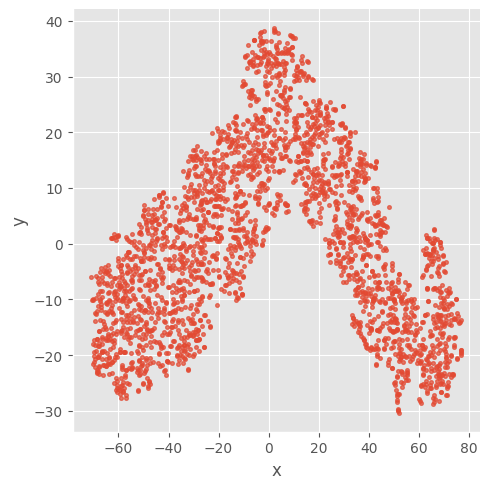

In [24]:
sns.lmplot(data = df, x = 'x', y = 'y', fit_reg=False, scatter_kws={'alpha':0.7, 's':7})
plt.show();

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [25]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([0, 0, 0, ..., 5, 3, 5])

In [26]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
.,63.136841,-8.061606,0
이,70.491951,-21.300932,0
는,73.492195,-23.323711,0
영화,68.446793,-21.491793,0
다,70.285080,-4.997357,0
고,73.201889,-10.818076,0
의,71.075363,-27.246237,0
하,75.877647,-12.971937,0
을,73.586708,-23.505905,0
에,68.841972,-26.673918,0


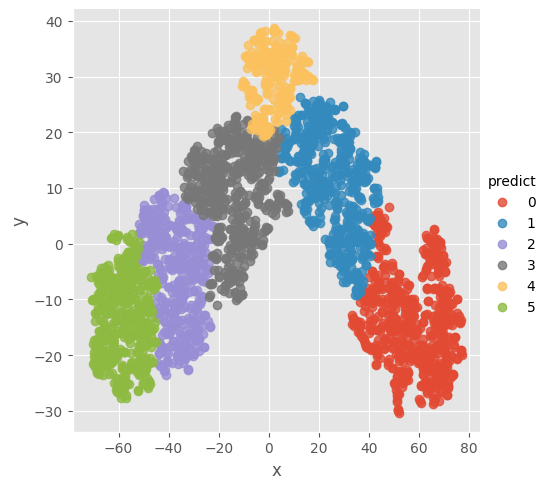

In [27]:
# 'df' 데이터프레임이 있다고 가정
sns.lmplot(x='x', y='y', data=results, fit_reg=False, hue='predict')

# 그래프를 보여줍니다.
plt.show()

#### average

In [28]:
avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = avg.fit_predict(df)
predict

array([2, 2, 2, ..., 0, 4, 0])

In [29]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
.,63.136841,-8.061606,2
이,70.491951,-21.300932,2
는,73.492195,-23.323711,2
영화,68.446793,-21.491793,2
다,70.285080,-4.997357,2
고,73.201889,-10.818076,2
의,71.075363,-27.246237,2
하,75.877647,-12.971937,2
을,73.586708,-23.505905,2
에,68.841972,-26.673918,2


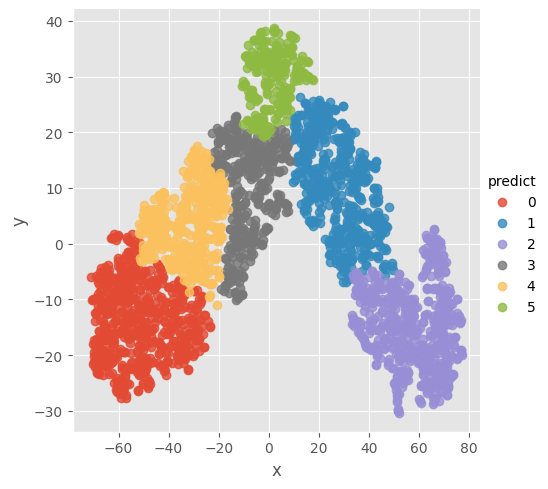

In [30]:
# 'df' 데이터프레임이 있다고 가정
sns.lmplot(x='x', y='y', data=results, fit_reg=False, hue='predict')

# 그래프를 보여줍니다.
plt.show()

#### complete

In [31]:
ward = AgglomerativeClustering(n_clusters=6, linkage='complete')

In [32]:
predict = ward.fit_predict(df)
predict

array([4, 4, 4, ..., 5, 0, 5])

In [33]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
.,63.136841,-8.061606,4
이,70.491951,-21.300932,4
는,73.492195,-23.323711,4
영화,68.446793,-21.491793,4
다,70.285080,-4.997357,4
고,73.201889,-10.818076,4
의,71.075363,-27.246237,4
하,75.877647,-12.971937,4
을,73.586708,-23.505905,4
에,68.841972,-26.673918,4


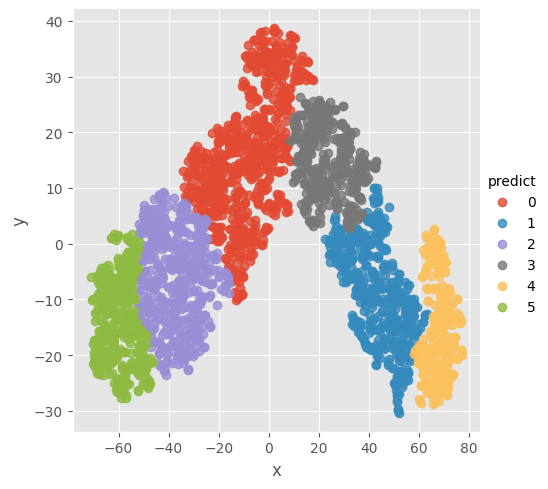

In [34]:
# 'df' 데이터프레임이 있다고 가정
sns.lmplot(x='x', y='y', data=results, fit_reg=False, hue='predict')

# 그래프를 보여줍니다.
plt.show()

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [35]:
!pip install scipy

In [36]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# 'x'와 'y' 열만 추출하여 사용
distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,2630,2631,2632,2633,2634,2635,2636,2637,2638,2639
0,0.000000,15.145210,18.443568,14.441797,7.777336,10.435675,20.762230,13.654285,18.647415,19.467066,...,131.254527,126.227448,116.117500,116.538935,97.917477,126.471669,96.403625,129.827888,96.026042,133.290568
1,15.145210,0.000000,3.618439,2.054045,16.304887,10.827466,5.973861,9.918562,3.799925,5.620623,...,138.495615,132.898864,122.562204,123.027389,105.820690,133.763792,103.622603,137.676284,106.440035,140.096451
2,18.443568,3.618439,0.000000,5.367682,18.604861,12.509004,4.607307,10.623070,0.205249,5.731357,...,141.587242,135.915876,125.557085,126.028008,109.027908,136.866007,106.745628,140.849090,109.911528,143.126456
3,14.441797,2.054045,5.367682,0.000000,16.596557,11.684998,6.326374,11.305111,5.520451,5.197171,...,136.460082,130.854080,120.515286,120.980975,103.807663,131.729824,101.591965,135.655413,104.550856,138.053071
4,7.777336,16.304887,18.604861,16.596557,0.000000,6.510649,22.262911,9.740161,18.800721,21.724545,...,138.594887,133.675094,123.612009,124.026301,105.172120,133.807685,103.797518,137.043120,102.529717,140.708358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,126.471669,133.763792,136.866007,131.729824,133.807685,136.405125,134.747369,139.028210,136.971274,132.472347,...,4.790567,6.020469,13.329594,12.744823,28.972493,0.000000,30.327172,6.672161,41.550020,8.169672
2636,96.403625,103.622603,106.745628,101.591965,103.797518,106.280043,104.700242,108.879990,106.853246,102.417885,...,35.064768,30.128930,20.586950,20.907194,5.579050,30.327172,0.000000,34.389760,26.348991,37.055643
2637,129.827888,137.676284,140.849090,135.655413,137.043120,139.889795,138.889092,142.600745,140.961064,136.601344,...,6.310538,12.387411,19.613297,19.029921,32.092614,6.672161,34.389760,0.000000,41.320606,11.033929
2638,96.026042,106.440035,109.911528,104.550856,102.529717,106.429654,108.918188,109.493881,110.057723,106.627064,...,45.646335,44.996488,39.693795,39.652695,21.341549,41.550020,26.348991,41.320606,0.000000,49.668785


* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

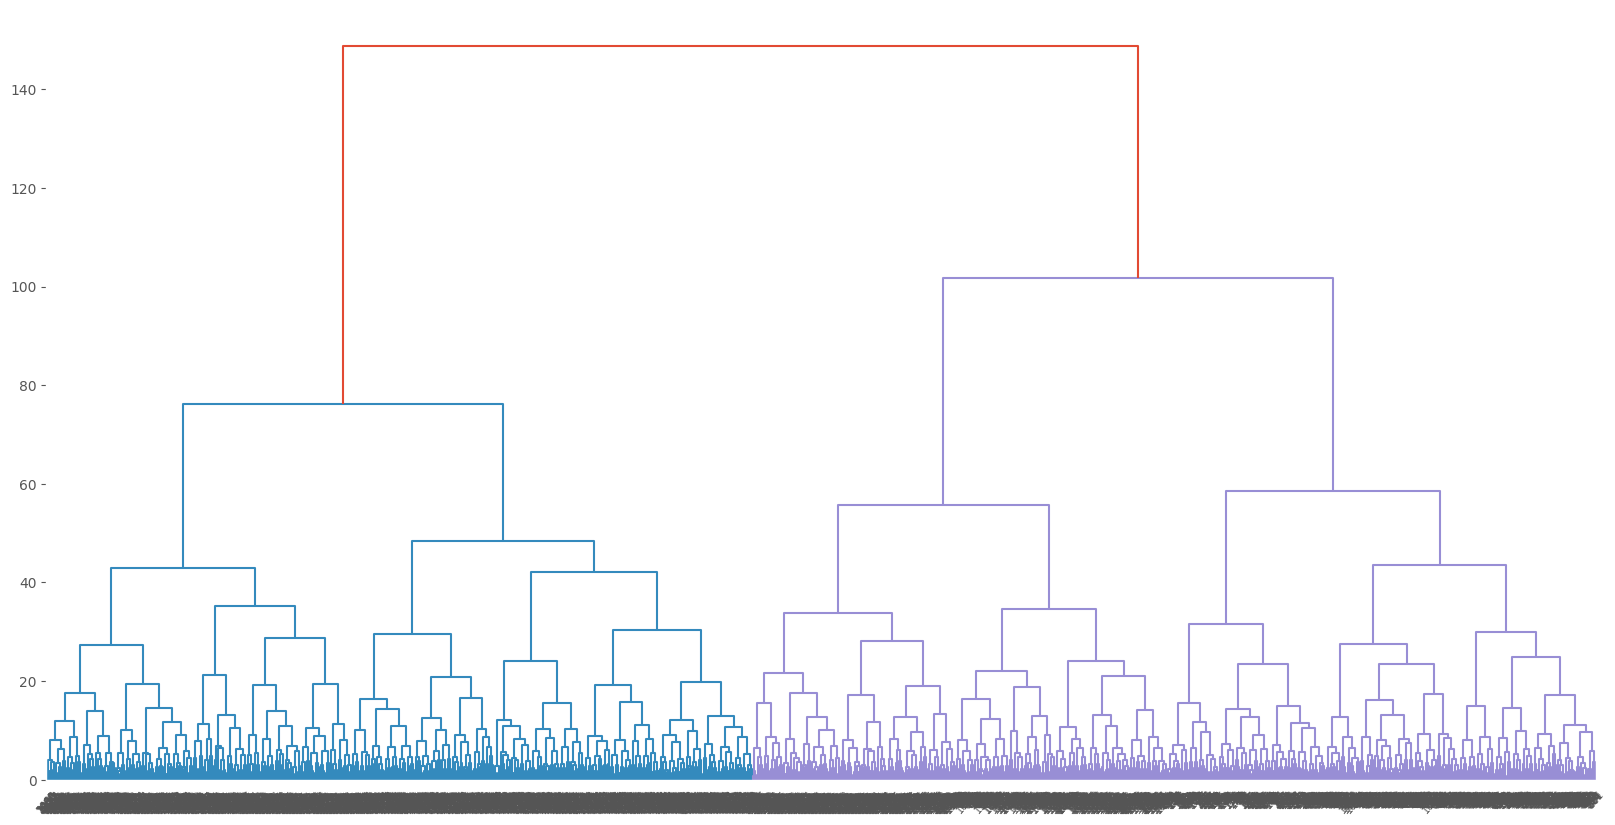

In [37]:
row_clusters = linkage(distmatrix, method='complete')

plt.figure(figsize=(20,10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

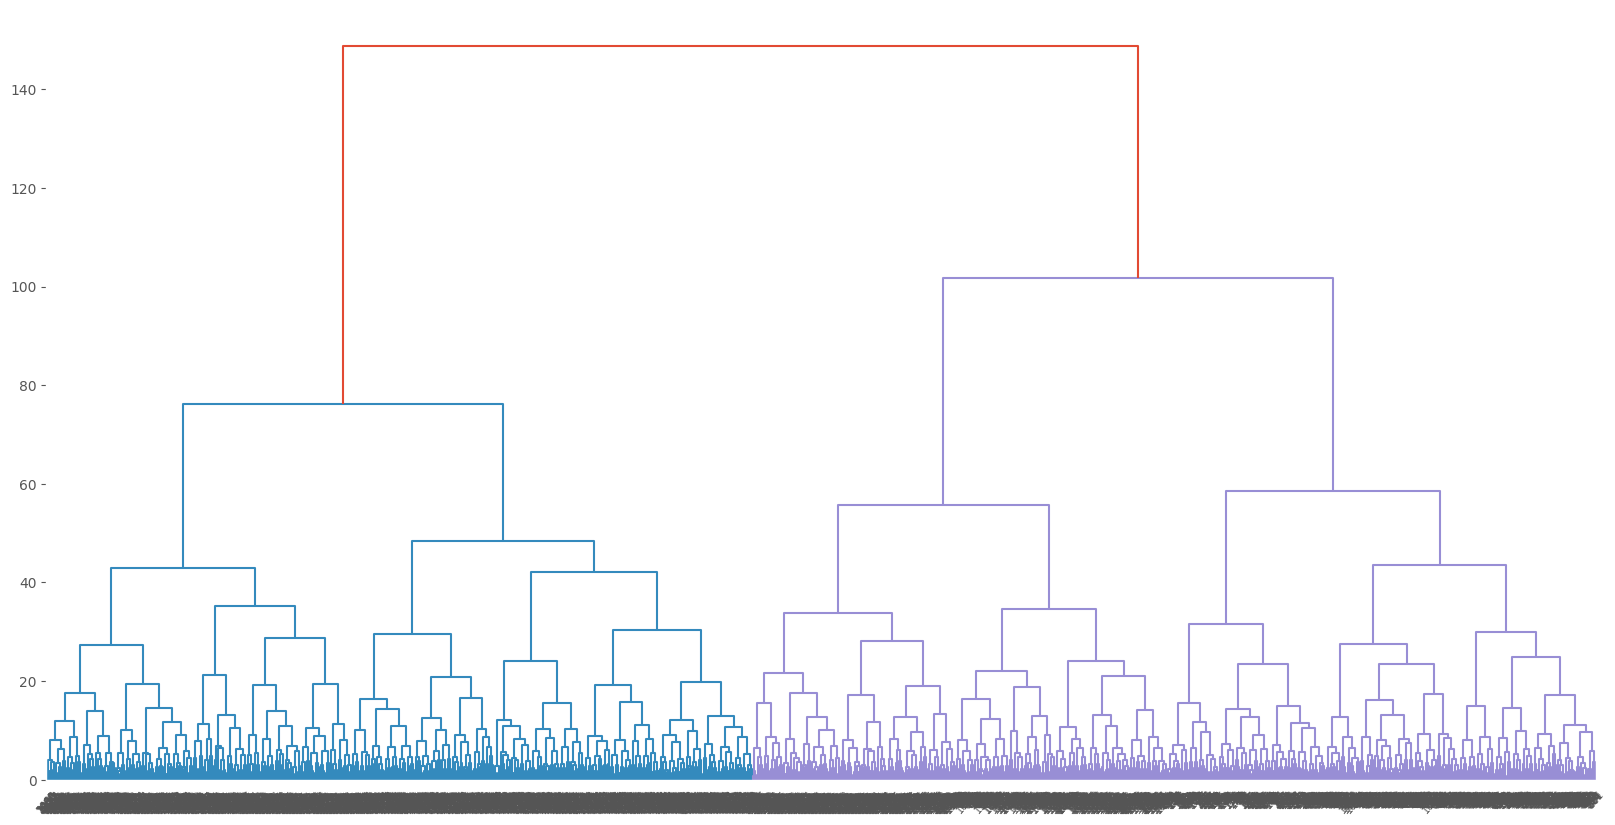

In [38]:
mergings = linkage(df, method='complete')

plt.figure(figsize=(20,10))
dendrogram(mergings,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [43]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
.,63.136841,-8.061606,1
이,70.491951,-21.300932,1
는,73.492195,-23.323711,1
영화,68.446793,-21.491793,1
다,70.285080,-4.997357,1
고,73.201889,-10.818076,1
의,71.075363,-27.246237,1
하,75.877647,-12.971937,1
을,73.586708,-23.505905,1
에,68.841972,-26.673918,1


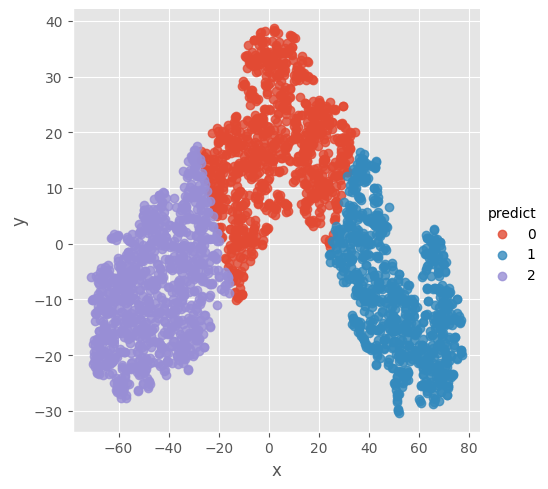

In [44]:
sns.lmplot(data=results, x='x',y='y', fit_reg=False, hue='predict')
plt.show()

### 클러스터 개수 6

In [45]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 3, ..., 0, 5, 0], dtype=int32)

In [46]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
.,63.136841,-8.061606,3
이,70.491951,-21.300932,3
는,73.492195,-23.323711,3
영화,68.446793,-21.491793,3
다,70.285080,-4.997357,3
고,73.201889,-10.818076,3
의,71.075363,-27.246237,3
하,75.877647,-12.971937,3
을,73.586708,-23.505905,3
에,68.841972,-26.673918,3


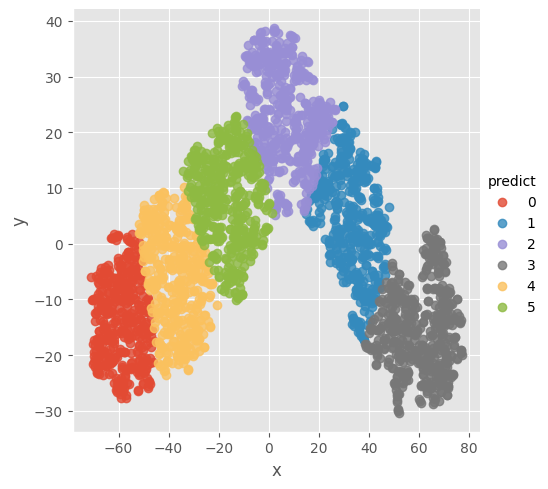

In [47]:
sns.lmplot(data=results, x='x',y='y', fit_reg=False, hue='predict')
plt.show()